In [1]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy import extract

import dataframe_image as dfi

In [2]:
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# determine the tables
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()

In [6]:
#  3. Convert the June temperatures to a list.
# want the temperature observation field for June rows from the Measurement table
# list comprehension & sqlalchemy extract
june_temps_list = [temp.tobs for temp in june_temps]
june_temps_list[:5]

[78.0, 76.0, 78.0, 76.0, 77.0]

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_summarystats = june_temps_df.describe()

# export as an image using dfi
dfi.export(june_temps_summarystats, 'Images/june_temp_summarystats.png')
june_temps_summarystats

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


### Exploratory analysis

In [9]:
june_temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   June Temps  1700 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


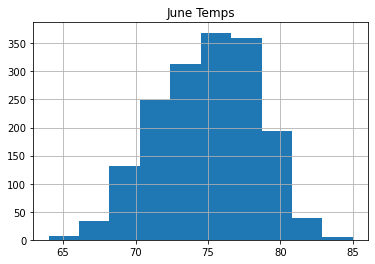

In [13]:
# plot a histogram
june_temps_df.hist()

plt.savefig('Images/june_temps_hist.png')

plt.show()

## D2: Determine the Summary Statistics for December

In [15]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()

In [16]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
dec_temps_list[:5]

[76.0, 74.0, 74.0, 64.0, 64.0]

In [17]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])
dec_temps_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [18]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_summarystats = dec_temps_df.describe()

# export as an image using dfi
dfi.export(dec_temps_summarystats, 'Images/dec_temp_summarystats.png')
dec_temps_summarystats

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Exploratory analysis

In [19]:
dec_temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   December Temps  1517 non-null   float64
dtypes: float64(1)
memory usage: 12.0 KB


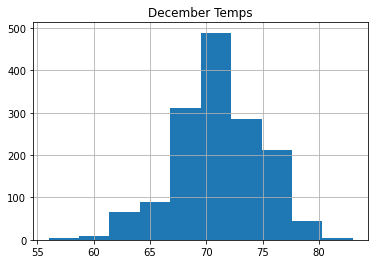

In [21]:
# plot a histogram
dec_temps_df.hist()

plt.savefig('Images/dec_temps_hist.png')

plt.show()